In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv("abalone.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
#changing the categorical data
data.V1[data.V1=='M']=1
data.V1[data.V1=='F']=2
data.V1[data.V1=='I']=3

In [8]:
data.describe()

,V2,V3,V4,V5,V6,V7,V8,Class
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
data.dtypes

V1        object
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
Class      int64
dtype: object

In [11]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
Class    0
dtype: int64

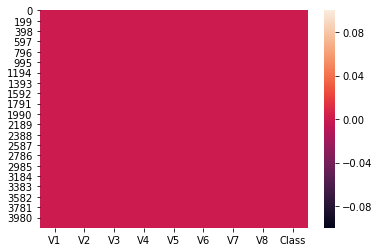

In [12]:
sns.heatmap(data.isnull())

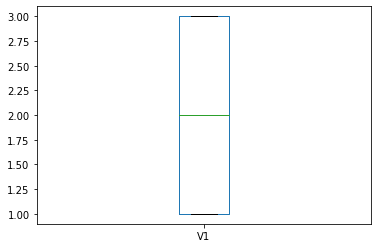

In [13]:
data["V1"].plot.box()

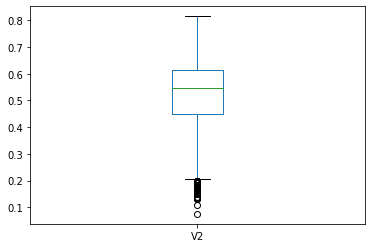

In [14]:
data["V2"].plot.box()

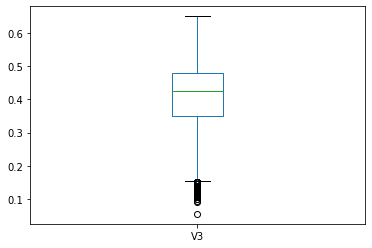

In [15]:
data["V3"].plot.box()

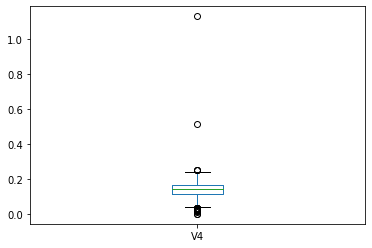

In [16]:
data["V4"].plot.box()

In [17]:
data.shape

(4177, 9)

In [19]:
data.corr()


,V2,V3,V4,V5,V6,V7,V8,Class
V2,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
V3,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
V4,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
V5,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
V6,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
V7,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
V8,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Class,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


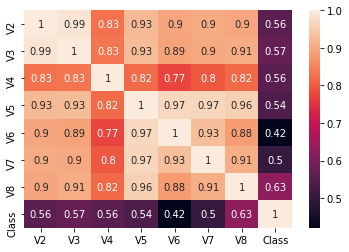

In [20]:
sns.heatmap(data.corr(),annot=True)

In [22]:
x=data.drop("Class",axis=1)
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [24]:
y=data["Class"]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Class, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=41)


In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3299, 8)
(878, 8)
(3299,)
(878,)


In [27]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)


0.5447010156734574

In [28]:
pred=lm.predict(x_test)
pred

array([11.24861514, 14.23812604,  6.13980459, 11.44778471,  9.57410457,
       10.5351024 ,  9.99936675,  7.90262777, 10.71535155,  8.68559705,
       10.18871961,  7.32273949, 10.81290216,  8.84393486, 13.42097019,
       12.58212192, 13.66266546,  6.28099473, 10.35921824,  9.52827732,
        7.9200021 ,  9.00621231,  8.68677389,  8.38718408, 12.5213703 ,
        6.65087788,  9.77948716, 15.43545673, 10.72141209, 11.33857141,
        7.81521928,  9.6718243 ,  6.60911439, 11.75163441, 10.54420384,
        7.50899059,  9.75679163,  7.96898556, 10.77437641,  8.82166661,
       10.27794512,  8.53497092,  8.87250443, 17.23402963,  6.4895613 ,
        9.78814044,  8.10808759,  9.57538371, 11.13560859,  7.93907956,
       10.59674465,  9.70909952, 12.16260337, 10.51493129,  8.87715478,
       10.04190075, 12.03288431,  9.8075608 , 11.12872538,  6.53887126,
       10.73418544, 14.02377573,  6.53433631, 14.78865173, 12.53115572,
        8.98550643,  8.8556924 ,  8.35637129, 10.58323653,  8.09

In [35]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
999,11,10.0
192,14,14.0
3523,4,5.0
857,12,15.0
861,12,12.0
3486,8,9.0
1803,10,10.0
1458,7,8.0
1644,10,9.0
2423,10,7.0


In [37]:
from sklearn.metrics import r2_score

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print(r2_score(y_test,pred))

0.11203449644051111


In [31]:
pred=dtc.predict(x_test)
pred

array([10., 14.,  5., 15., 12.,  9., 10.,  8.,  9.,  7., 13., 11.,  9.,
       10., 19., 15., 10.,  6., 10.,  9.,  7., 10.,  9.,  8., 20.,  7.,
        9., 16., 17., 10.,  9., 11.,  6., 10., 10.,  6., 14., 11.,  8.,
        8., 13.,  6.,  9., 19.,  6.,  9.,  7., 10., 10.,  7.,  8.,  8.,
       15., 10.,  9.,  9.,  9., 11.,  9.,  6., 12., 17.,  5., 17., 10.,
       10.,  8.,  9.,  8.,  9.,  8.,  9.,  8.,  7., 10.,  9., 10.,  8.,
       11.,  9., 13.,  8.,  9.,  7., 11.,  6., 11.,  5.,  6., 14., 11.,
        7.,  9., 13., 12.,  7., 13., 11., 10., 13., 17., 14., 16., 11.,
       19.,  7., 10.,  9.,  9., 10., 11., 10., 17.,  9.,  7., 14.,  8.,
        9.,  7., 10.,  9., 11., 11.,  7.,  5.,  9., 13., 12., 12., 14.,
        7., 11.,  5.,  7.,  9., 15., 10.,  8.,  6., 10., 11.,  5.,  9.,
       11., 13., 10., 12., 10.,  4., 12., 11.,  7.,  6., 10., 16.,  6.,
        9., 12.,  8., 11.,  9.,  7., 10., 21., 13.,  7.,  6., 18.,  8.,
       13.,  5., 11., 10., 14.,  8., 12.,  7., 15., 15.,  9.,  7

In [39]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
999,11,10.0
192,14,14.0
3523,4,5.0
857,12,15.0
861,12,12.0
3486,8,9.0
1803,10,10.0
1458,7,8.0
1644,10,9.0
2423,10,7.0


In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
r2_score(y_train,rfr.predict(x_train))

0.9106194774354929

In [41]:
pred=rfr.predict(x_test)
pred

array([ 9. , 12.3,  5.7,  9.9,  9.6, 11.3, 11.4,  8.3, 11.3,  8.4, 10.5,
        7.3, 10.5,  9.4, 15.7, 18.4, 15.6,  5.6, 10.5,  9.4,  7.8, 10.1,
       10. ,  7.5, 13.6,  6.9, 10.3, 16.4, 13.1, 10.9,  7.9, 10.4,  6.3,
       11.7,  9.2,  6.6, 12.6, 10.8, 11. ,  9.6, 12.2,  7.8,  9.2, 13.8,
        7. ,  9.2,  8.4,  9.4,  9.8,  7.7,  9.9, 12.2, 11.7,  9.9,  8.3,
        9.9, 10.4,  9.7, 10.6,  5.7, 12.6, 13.9,  5.7, 16.1, 12.9, 12.1,
        8.2, 10.2, 13.5,  8.3, 10.9,  8.9,  6.9,  8.4,  9.3,  6.9, 14. ,
        9.2, 10.1,  8.3, 12.6, 12.6, 11.4,  7.1,  9.7,  6.2,  9.8,  7.1,
        8.4, 10.5, 11.1,  9.7,  9.3, 13.6, 10.4, 10.4, 10.3, 10.5,  8.3,
       10.8, 12.9,  9.5, 14.1, 10.5, 12.8,  8.6, 10.3,  7.5,  8.2, 10.1,
       11.9, 12. , 16.7,  7.6,  7.5, 11.9, 10.3,  8. ,  7.4, 12.2,  8.7,
       10.9, 11.3,  6.8,  6.4, 12.1, 10.9, 14.4, 12.4, 13.3,  6.2,  8.4,
        5.8,  8. , 10.5, 14.6,  9.1,  9.8,  7.2,  9.7,  9.8,  6.4, 10.8,
       11. , 10.1, 10.4, 11.3, 11.2,  3.3, 11. , 10

In [42]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
999,11,9.0
192,14,12.3
3523,4,5.7
857,12,9.9
861,12,9.6
3486,8,11.3
1803,10,11.4
1458,7,8.3
1644,10,11.3
2423,10,8.4


In [43]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 1.6739179954441914
Mean Squared Error: 5.688940774487471
Root Mean Squared Error: 2.385150052824239
